<a href="https://colab.research.google.com/github/dongjaeseo/colab/blob/main/backpropagation3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import numpy as np
from matplotlib import pyplot as plt

In [65]:
# 데이터셋 불러오기
# 데이터 경로에 맞게 경로 수정해주기

train_data = np.loadtxt('/content/drive/MyDrive/data/backprop/training.dat', unpack = True)
test_data = np.loadtxt('/content/drive/MyDrive/data/backprop/testing.dat', unpack = True)

In [66]:
# 트레인, 테스트 데이터 75개
# 25개씩 나눠져서 총 3개의 클래스가 있다
# 다중분류 하는 모델을 만들것이기 때문에 원-핫 인코딩을 해주었다
# >> 라벨값이 0 = [1, 0, 0] / 1 = [0, 1, 0] / 2 = [0, 0, 1]

train_label = []
test_label = []
for i in range(3):
    for j in range(25):
        label = np.zeros(3)
        label[i] = 1
        train_label.append(label)
        test_label.append(label)
    
train_label = np.array(train_label).T
test_label = np.array(test_label).T

In [67]:
# 데이터의 쉐이프를 찍어보자
# 트레인은 4, 75 / 테스트는 3, 75

print(train_data.shape) # (4, 75)
print(test_data.shape) # (3, 75)

(4, 75)
(4, 75)


In [68]:
# 사용할 활성화 함수
# 다중분류를 하기 위해 마지막 레이어에서 사용할 소프트맥스 함수
# 일반적으로 사용 시 성능이 좋은 ReLu 활성화 함수를 사용하였다

def relu(x):
    return np.maximum(0,x)

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x),axis=0)

In [69]:
# 모델을 정의 해주었다
# 파라미터로는 트레인_X, 트레인_Y, learning_rate, 에폭, 사용할 활성화 함수가 있다

def model(X, Y, learning_rate = 0.1, num_iterations = 20, activation = relu):

    # 모델의 구조를 먼저 정의해주자
    # 인풋으로는 X.shape[0] 즉 4 / 히든레이어는 100, 100 / 아웃풋은 소프트맥스를 통해 3개의 클라스 중 분류하기 때문에 3
    layer_dims = [X.shape[0], 100, 100, 3]  

    # grads 라는 딕셔너리에는 미분값을 담을것이다
    grads = {}
    train_costs = []
    test_costs = []

    # parameters 라는 딕셔너리에는 가중치값을 담을것이다
    # 추후 두개의 딕셔너리를 통해 가중치에서 미분값을 연산하여 가중치를 조정해준다
    parameters = {}

    # 가중치 초기화
    # Glorot Initialization 이라고 하는 가중치 초기화 방법이다
    # 통상적으로 쓰이는 초기화 방식이나 그냥 0 으로 초기화 하셔도 학습 자체에는 문제가 없습니다
    for i in range(1, len(layer_dims)):
        m = np.sqrt(6/(layer_dims[i]+layer_dims[i-1]))
        parameters['W' + str(i)] = np.random.uniform(-m, m, size = (layer_dims[i], layer_dims[i-1]))
    
    # num_iteration 에폭 
    for i in range(0, num_iterations):  
        '''
        '''    

        # 순전파
        # 먼저 W1, W2, W3 를 정의해줍니다
        # 각각 인풋-히든1 / 히든1-히든2 / 히든2-아웃풋 을 연결해주는 가중치값입니다
        W1 = parameters["W1"]
        W2 = parameters["W2"]
        W3 = parameters["W3"]

        # W1, 인풋을 연산 / 히든1이 활성화 함수를 거치기전
        Z1 = np.dot(W1, X)
        # A1은 Z1이 활성화 함수를 거친 후 히든1 에서 나오는 값 
        A1 = activation(Z1)

        # W2, A1을 연산 / 히든2가 활성화 함수를 거치기전
        Z2 = np.dot(W2, A1)
        # A2는 Z2가 활성화 함수를 거친 후 히든2 에서 나오는 값
        A2 = activation(Z2)

        # W3, A2을 연산 / 최종 아웃풋이 활성화 함수를 거치기전
        Z3 = np.dot(W3, A2)
        # 아웃풋에 소프트 맥스 함수를 거쳐 총 3개의 값이 나온다
        # 소프트맥스 함수 특징:
        # 3개의 값이라고 할때 3개를 합치면 1 >> [0.1, 0.1, 0.8] 과 같이 모든 값을 합치면 1이 나온다
        # 추후에 예측과정에서 제일 높은 숫자를 가진 인덱스를 추출할것 - [0.1, 0.1, 0.8] 라면 0.8이 제일 높은 확률을 가지기에 예측결과는 [0, 0, 1] 즉 2라고 할수있다
        Y_pred = softmax(Z3)

        '''
        '''
        # 비용함수
        # 다중 분류에서 쓰이는 비용 함수는 Cross-Entropy 라고 한다
        # 간단하게 설명하면 소프트맥스 함수를 거친 최종 아웃풋값이 자신의 라벨값과 비슷해질수록 낮아진다!
        # >>  실제 라벨이 [0, 0, 1] 이라면 / [0.1, 0.1, 0.8] 이 [0.2, 0.2, 0.6] 보다 낮은 로스값을 가진다
        m = Y.shape[1]
    
        logprobs = np.multiply(-np.log(Y_pred),Y) + np.multiply(-np.log(1 - Y_pred), 1 - Y)
        cost = 1./m * np.nansum(logprobs)  

        '''
        '''

        # 역전파
        m = X.shape[1]
        
        # dZ3 는 최종 아웃풋과 실제값의 차이
        # W3 를 조정해주려면 dW3 값을 계산해야한다
        dZ3 = Y_pred - Y
        dW3 = 1./m * np.dot(dZ3, A2.T)
        

        dA2 = np.dot(W3.T, dZ3)
        dZ2 = np.multiply(dA2, np.int64(A2 > 0))
        dW2 = 1./m * np.dot(dZ2, A1.T)
        
        dA1 = np.dot(W2.T, dZ2)
        dZ1 = np.multiply(dA1, np.int64(A1 > 0))
        dW1 = 1./m * np.dot(dZ1, X.T)
        
        grads = {"dZ3": dZ3, "dW3": dW3, 
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, 
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1,}

        '''
        '''
        # 가중치 업데이트
        # grads 에는 미분값이
        # parameters 에는 가중치값이 들어있고 이를 토대로
        # W = W - lr*dW  식을 이용해서 가중치를 업데이트 해준다
        for k in range(len(parameters)//2):
            parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        
        # 최종적으로 구해진 오차값을 저장
        print("Cost after iteration {}: {}".format(i, cost))
        train_costs.append(cost)
    
    # 저장된 오차값을 플롯하는 코드
    # X축은 에폭 / Y축은 오차값이 출력
    plt.plot(train_costs, color = 'blue')
    plt.ylabel('training_cost')
    plt.xlabel('iterations')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    # 최종적으로 구해진 가중치값을 리턴해준다
    return parameters

Cost after iteration 0: 2.04550159823411
Cost after iteration 1: 1.9363887619709417
Cost after iteration 2: 1.854624168943871
Cost after iteration 3: 1.8023054799976177
Cost after iteration 4: 1.7571164110911999
Cost after iteration 5: 1.7148610279037524
Cost after iteration 6: 1.6783775998302939
Cost after iteration 7: 1.6474916813399343
Cost after iteration 8: 1.6194210070864516
Cost after iteration 9: 1.5940189646314025
Cost after iteration 10: 1.569678337776507
Cost after iteration 11: 1.5465918411522972
Cost after iteration 12: 1.524965596823077
Cost after iteration 13: 1.5045700428962658
Cost after iteration 14: 1.4847640411038812
Cost after iteration 15: 1.4657486254262815
Cost after iteration 16: 1.447024382349617
Cost after iteration 17: 1.4295948903416116
Cost after iteration 18: 1.4129461542201263
Cost after iteration 19: 1.397157397343881
Cost after iteration 20: 1.3822896489402994
Cost after iteration 21: 1.3679215287974542
Cost after iteration 22: 1.3542267636921184
Cost 

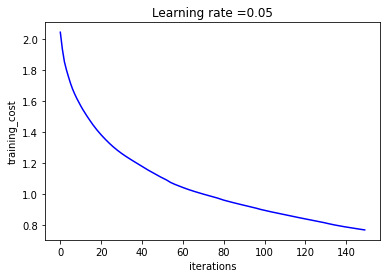

In [70]:
parameters = model(train_data, train_label, learning_rate = 0.05, num_iterations = 150, activation = relu)

In [71]:
# 예측 함수
# 저장된 가중치값을 가지고 있기 때문에
# 테스트 데이터를 이 가중치값으로 순전파를 통과시켜주면 모델의 예측값이 나온다
def predict(X, Y, parameters, activation = relu):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]

    # 위에 훈련시 사용한 순전파 모델
    Z1 = np.dot(W1, X)
    A1 = activation(Z1)
    Z2 = np.dot(W2, A1)
    A2 = activation(Z2)
    Z3 = np.dot(W3, A2)
    Y_pred = softmax(Z3)

    # 이렇게 모델의 예측값인 Y_pred 값은 그대로 사용할수는 없다
    # 총 3개의 데이터로 이뤄져 있기 때문
    # [0.1, 0.2, 0.7] 이런식으로 각 클래스에 대한 확률이 나와있다
    # 그래서 여기서 제일 큰 확률을 가진 클래스를 찾아주는 코드다
    prediction = np.argmax(Y_pred, axis = 0)
    return prediction

# 이렇게 얻은 모델 가중치로 훈련데이터, 테스트 데이터를 각각 예측해본 결과
'''
On the training set:
Accuracy: 0.9466666666666667
On the test set:
Accuracy: 0.9733333333333334
'''
# 훈련데이터에는 96 퍼센트의 정확도를 보였고
# 테스트데이터에는 89.33 퍼센트의 정확도를 보였다

# 아래는 정확도를 보게 해주는 코드
train_pred = predict(train_data, train_label, parameters)
print ("On the training set:")
print("Accuracy: "  + str(np.mean((train_pred[:] == np.argmax(train_label, axis = 0)))))

test_pred = predict(test_data, test_label, parameters)
print ("On the test set:")
print("Accuracy: "  + str(np.mean((test_pred[:] == np.argmax(test_label, axis = 0)))))

On the training set:
Accuracy: 0.96
On the test set:
Accuracy: 0.96


In [76]:
!pip install nbconvert
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/backpropagation3.ipynb"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-plain-generic is already the newest version (2017.20180305-2).
texlive-xetex is already the newest version (2017.20180305-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/backpropagation3.ipynb to html
[NbConvertApp] Writing 327917 bytes to /content/drive/MyDrive/Colab Notebooks/backpropagation3.html
